In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import json

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.api import ai_client
from src.utils import *
from src.const import *
from src.plots import *
from src.signal_providers.signal_manager import *
from src.news_providers.news_api_provider import *
from src.agents.news_filtering_agent import *
from src.agents.trading_agent import *

%load_ext autoreload
%autoreload 2

sns.set_theme(style="darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
coin = "ETH"

cutoff = subtract_time(get_current_datetime(), days=20)
str(cutoff)

'2024-04-01 01:27:33.988751'

In [18]:
day_history = get_day_history(coin, cutoff)
week_history = get_week_history(coin, cutoff)
month_history = get_month_history(coin, cutoff)
year_history = get_year_history(coin, cutoff)

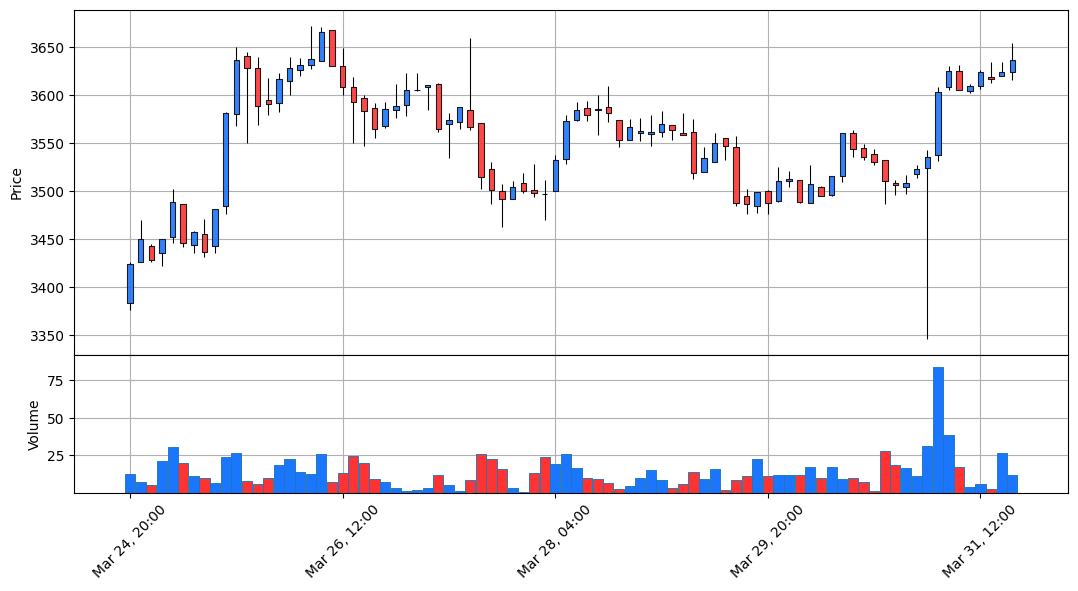

In [19]:
make_candlebars(week_history)

In [20]:
napi = NewsApi()
trading_agent = TradingAgent()
filtering_agent = NewsFilteringAgent()

In [22]:
news = napi.get_news(coin, start_date=subtract_time(cutoff, days=10))
filtered_news = filtering_agent.filter_news(news)
json.loads(filtered_news)

{'headlines': ['SEC opens comment period for Ethereum spot ETF proposals',
  'U.S. Government moves $2 billion in seized Bitcoin from Silk Road',
  'Do Kwon and Terraform Labs found liable for $40B fraud',
  'Goldman Sachs executive remains skeptical about Bitcoin',
  'Hong Kong approves first spot Bitcoin and Ethereum ETFs',
  'Ethereum: Is it time you ignore the noise and HODL ETH for dear life?',
  'Crypto Price Prediction: Easter Spirit Uplifts ETH & XRP to 1-3%, While WIF Enjoys 11% Jump',
  'Crypto Trader Bullish on One ‘Unpumped’ Altcoin, Updates Outlook on Bitcoin (BTC) and Ethereum (ETH)',
  'Investors Double Down On Bitcoin And Ethereum Amid Market Dips! Here’s What To Expect From BTC And ETH Price Next',
  'VanEck CEO Says Transaction Fee Is Bigger Story Than Bitcoin or Ethereum ETFs',
  'Ether Rallies to $3.6K as Bitcoin Holds Steady at $71K'],
 'sentiment': 'Mixed',
 'description': "Major headlines in the cryptocurrency sector include the SEC opening a comment period for E

In [46]:
balance = {coin: 0, "USDT": 100}
operations_history = []

[{'role': 'system', 'content': 'You are professional trader.\n            You have deep knowledge of cryptocurrencies and trading markets, and you can maximize profits the most efficiently.\n            You trade in USDT.\n            \n            You an only buy or sell at the current price, you can not set stop loss.\n            Avoid spending all money in one deal, play smart.\n            \n            Respond with json of this format: \n            {\n                \'description\': what you see on charts, general short and long term trends, \n                \'trend_analysys\': rough prediction of near future development of coin,\n                \'techical_analysys\': visual technical analysis of plot and indicators,\n                \'optimal_strategy": optimal trading strategy to maximize profits in this situation,\n                \'final_decision\': what to do, possible variants: \'sell\', \'buy\', \'hold\' (do nothing),\n                \'amount\': amount of coin to buy 
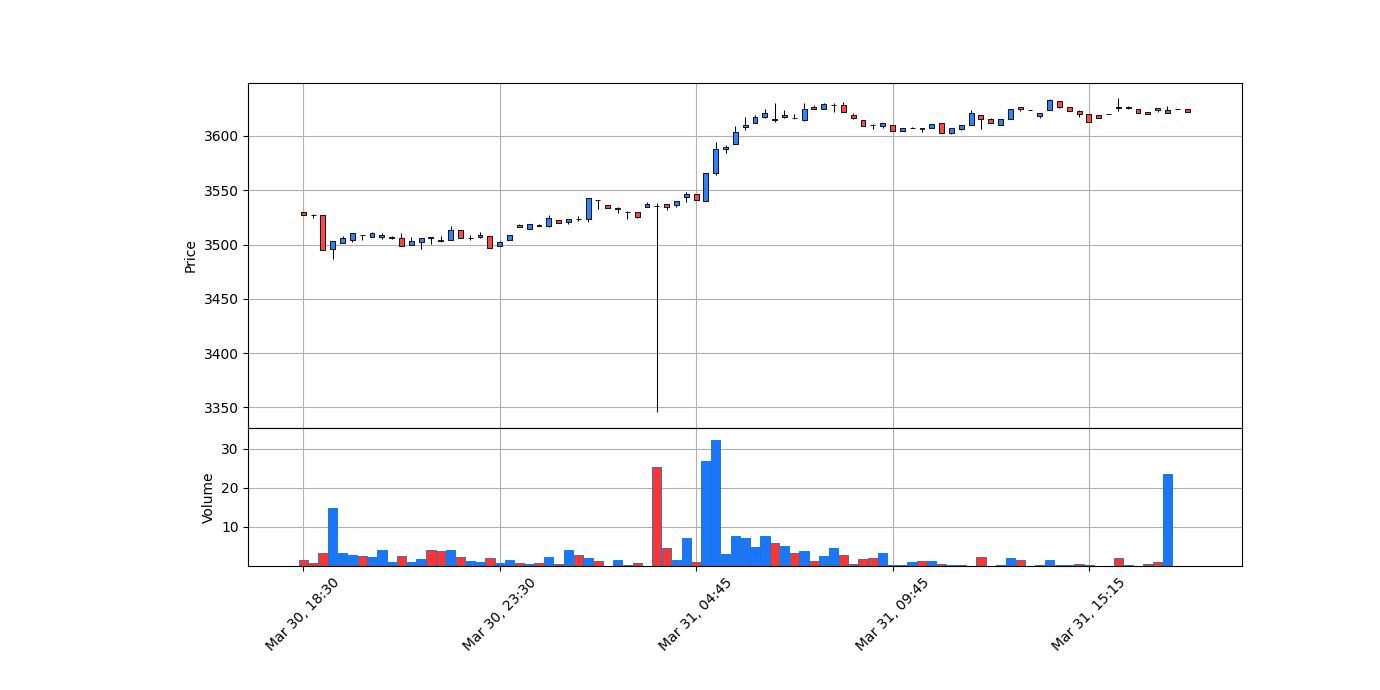
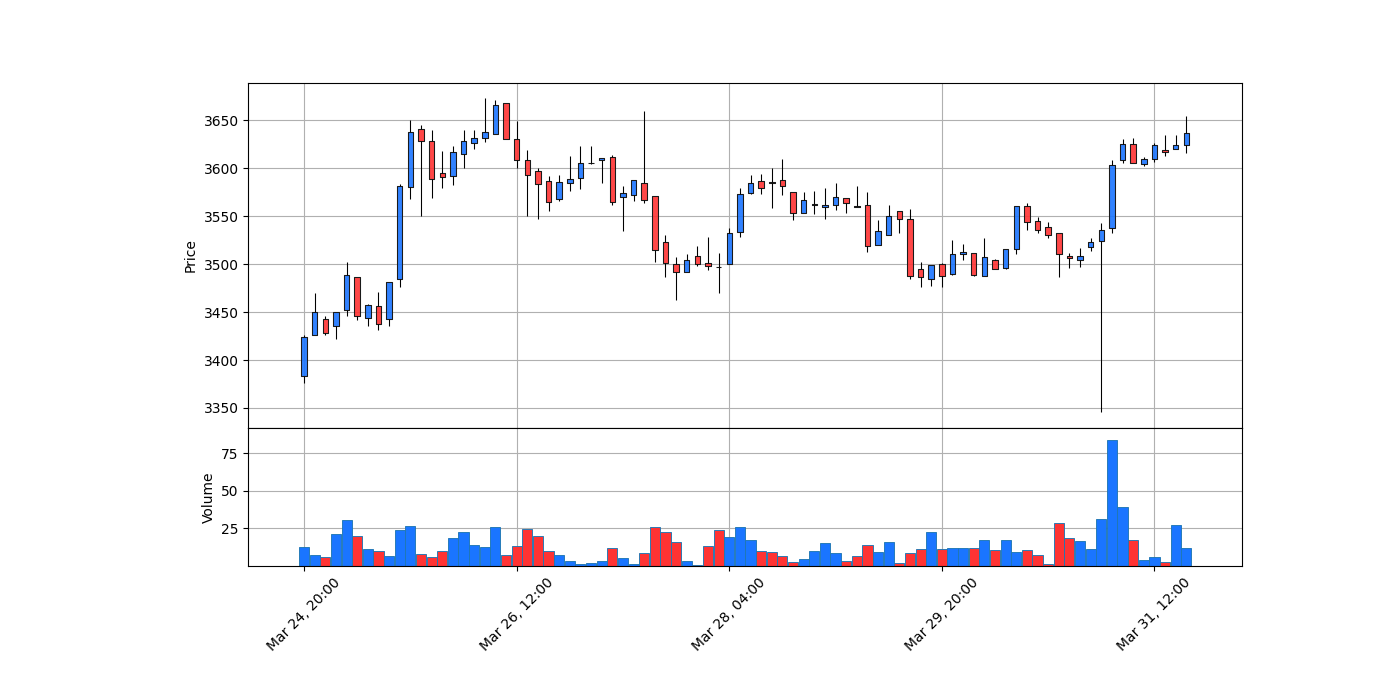
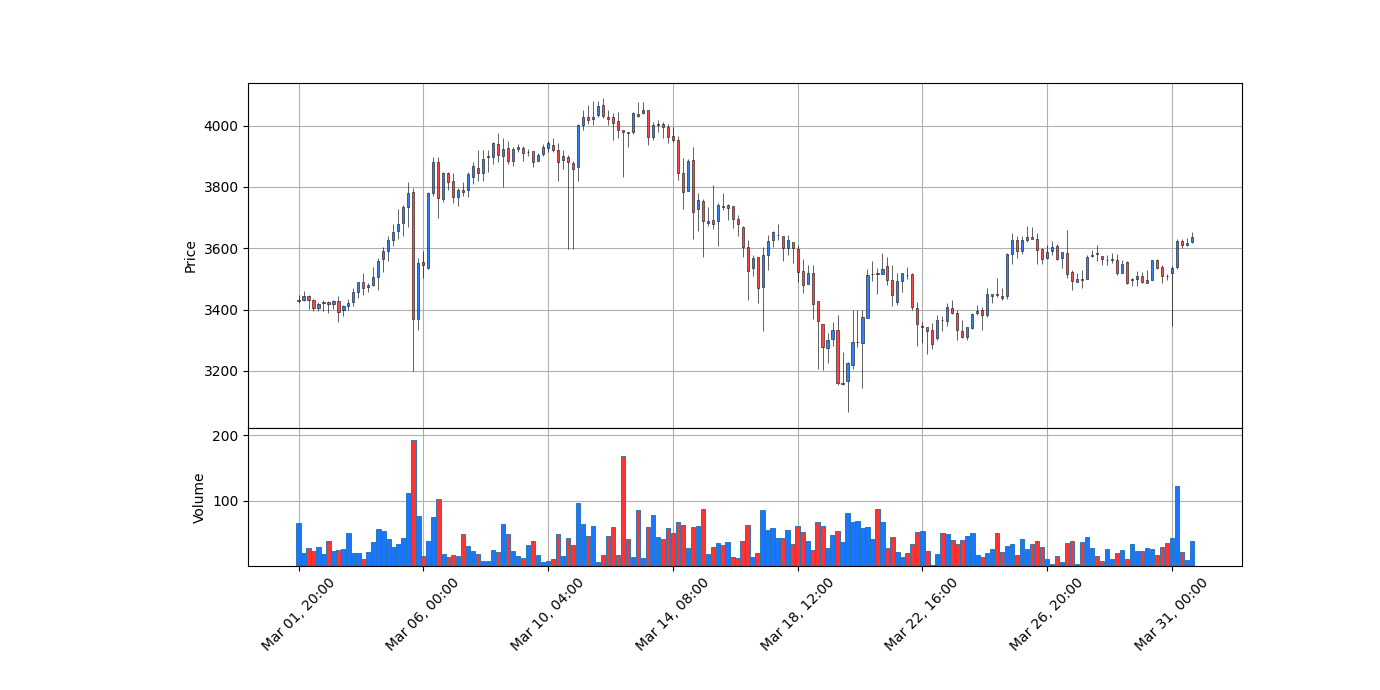
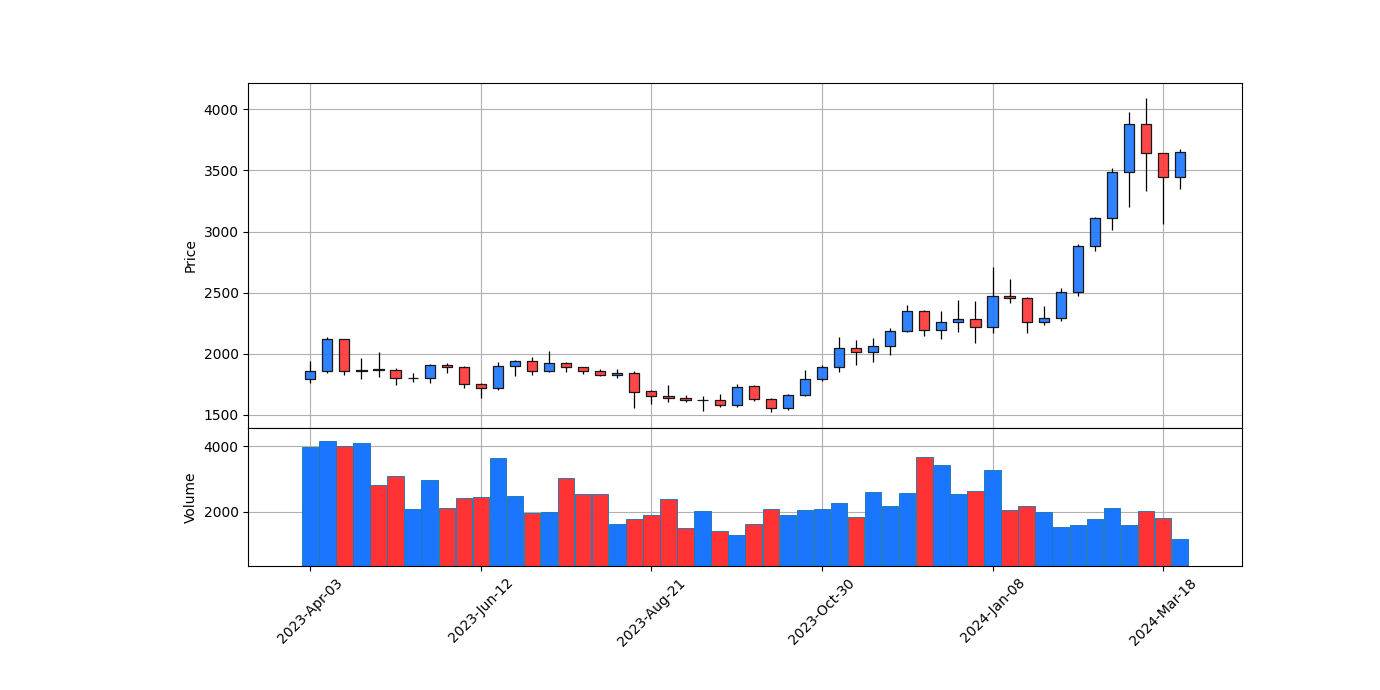

{'description': "After reviewing the provided charts (daily, weekly, monthly, and yearly), along with recent news and current market conditions, it appears that Ethereum (ETH) has been in a relatively bullish trend over the past year, showing some stability and progressive growth over the last few months. Recently, ETH has seen price stabilization around the $3600 mark with occasional spikes and retreats. The approval of first spot Bitcoin and Ethereum ETFs in Hong Kong and the SEC's interest in Ethereum ETFs adds positive sentiment and could drive further demand, impacting the price positively in mid to long-term.",
 'trend_analysis': 'The short-term trend for Ethereum appears moderately bullish, with the price maintaining levels around $3600, sporadically approaching the higher $3700 range. The longer-term outlook seems quite positive given the recent developments in regulatory acceptance and growing institutional interest.',
 'technical_analysis': 'The daily and weekly charts show r

In [47]:
predict = trading_agent.decide(
    coin=coin,
    news=filtered_news,
    day_data=day_history,
    week_data=week_history,
    month_data=month_history,
    year_data=year_history,
    operations_history=operations_history,
    current_balance=balance,
    verbose=True,
)

json.loads(predict)

In [48]:
result = json.loads(predict)
if result["final_decision"] == "buy":
    balance[coin] += float(result["amount"])
    balance["USDT"] -= float(result["usdt_amount"])
    operations_history.append(
        {"action": "buy", "amount": result["amount"], "price": result["price"], "date": str(cutoff)}
    )

if result["final_decision"] == "sell":
    balance[coin] -= float(result["amount"])
    balance["USDT"] += float(result["usdt_amount"])
    operations_history.append(
        {"action": "sell", "amount": result["amount"], "price": result["price"], "date": str(cutoff)}
    )

print(balance, operations_history)

{'ETH': 0.014, 'USDT': 49.29} [{'action': 'buy', 'amount': 0.014, 'price': 3622.34, 'date': '2024-04-01 01:27:33.988751'}]
